In [2]:
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from iplib import *

In [13]:
lenna = imgRead("lenna.jpg")
gray = bgr2gray(lenna)
class_cnt = 10
km = KMeans()
km.fit(gray.reshape(np.prod(gray.shape), 1))
result = np.reshape(km.labels_, gray.shape)
classes = np.unique(result)
centers = km.cluster_centers_

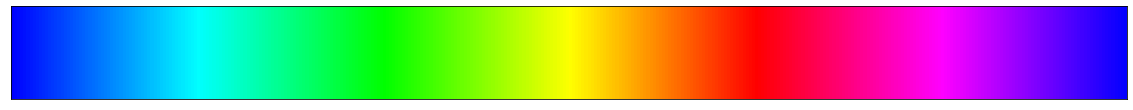

In [23]:
def genBand(cnt: int) -> np.ndarray:
  colors = np.arange(0 ,360, 360//cnt)
  band = np.zeros((30,360,3))
  for i, c in enumerate(colors):
    band[:, i*(360//cnt):(i+1)*(360//cnt)+1, :] = [c, 1.0, 1.0]
  return cv2.cvtColor(np.float32(band), cv2.COLOR_HSV2RGB)
band = genBand(360)
figSize(5,20)
imgPlot(band)
plt.show()

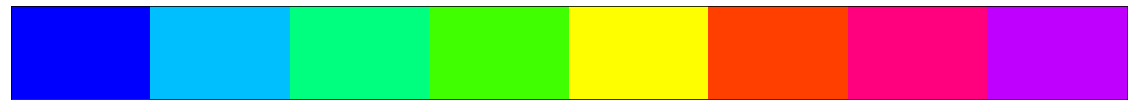

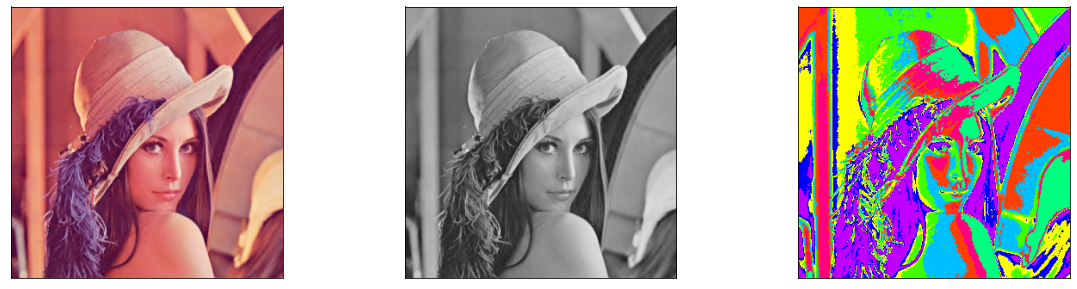

In [24]:
h, w = result.shape
colors = np.arange(len(classes)) * (360 // len(classes))
np.random.shuffle(colors)
band = genBand(len(classes))
res = np.zeros((h,w,3), dtype=np.float32)
for i,c in enumerate(classes):
  res[result == c] = [colors[i], 1.0, 1.0]
res = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)
figSize(5,20)
imgPlot(band)
plt.show()
imgPlotTable([lenna, gray, res], 1, 3)